In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
import csv
import re

In [2]:
import requests
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import nltk

def get_keywords(year, month, day, event):
    if month == 3:
        day += 43890
    elif month == 4:
        day += 43921
    else:
        day += 43951

    url = f"https://timesofindia.indiatimes.com/2020/{month}/{day}/archivelist/year-{year},month-{month},starttime-{day}.cms"
    page_request = requests.get(url)
    data = page_request.content
    soup = BeautifulSoup(data, "html.parser")

    news_divs = soup.find_all('div', style="font-family:arial ;font-size:12;font-weight:bold; color: #006699")

    news_links = []
    for div in news_divs:
        links = div.find_all('a')
        for link in links:
            news_links.append(link.get('href'))
    matching_links = []

    for link in news_links:
        if event in link:
            matching_links.append(link)

    all_keywords = set()

    for url in matching_links:
        response = requests.get(url)
        html_content = response.content

        soup = BeautifulSoup(html_content, 'html.parser')

        meta_tag = soup.find('meta', attrs={'name': 'keywords'})

        if meta_tag and 'content' in meta_tag.attrs:
            keywords = meta_tag['content'].split(',')
            all_keywords.update(keywords)

    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    lemmatized_keywords = {lemmatizer.lemmatize(keyword) for keyword in all_keywords}
    lemmatizer = WordNetLemmatizer()
    keyword_list = list(all_keywords)
    lemmatized_keywords = [lemmatizer.lemmatize(keyword) for keyword in keyword_list]
    filtered_keywords = [keyword for keyword in lemmatized_keywords if len(keyword) >= 3]

    return filtered_keywords

In [6]:
def calculate_emotion(date, month, emotion, event):
    emotion = emotion.lower()
#     csv_file_path = f"/Users/PIYUSH/Desktop/{month}/{date}_labelled.csv"
    csv_file_path = f"C:/Users/PIYUSH/Desktop/time series/{date}_labelled.csv"
    
#     "C:\Users\PIYUSH\Desktop\time series\2020-04-05_labelled.csv"
    
    emotion_numbers = [] 
    
    data_list = []
    
    with open(csv_file_path, mode='r', newline='', encoding='utf-8') as csv_file:
        reader = csv.DictReader(csv_file)
        for row in reader:
            data_list.append(row)
            
    for data in data_list:
        if re.findall(event, data["content"], flags=re.IGNORECASE):
            emotion_numbers.append(float(data[emotion])) 
            
    return emotion_numbers

def calculate_emotion_for_date(date,emotion,year,month,day):
    total_emotion_numbers = [] 
    keywords = get_keywords(year, month, day, "candle")

    for i in keywords:
        emotion_numbers = calculate_emotion(date,4, emotion, i)  
        total_emotion_numbers.extend(emotion_numbers)  
    if (len(total_emotion_numbers)==0):
        return 0
    average_emotion_number = sum(total_emotion_numbers) / len(total_emotion_numbers)
    return average_emotion_number

In [7]:
year = int(input("Year: "))
month = int(input("Month: "))
day = int(input("Day: "))
emotion = input("Emotion: ")

emotion_score = calculate_emotion_for_date("2020-04-05", emotion, year,month,day)

Year: 2020
Month: 4
Day: 5
Emotion: joy


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PIYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
print(emotion_score)

0.43052620203147535


In [9]:
#Summarizing what I have done uptil now:
''' 
(1) generate all the keywords.
(2) calculating emotion score for each day, for a corresponding emotion.
'''

#What should be my next steps?
''' 
(1) generating the emotion_score for each between (LI, HI).
(2) store it in list
(3) plot the graph
'''
del_t = 14

Year: 2020
Month: 4
Day: 5
Emotion: joy


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PIYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PIYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PIYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PIYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PIYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PIYUSH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]    

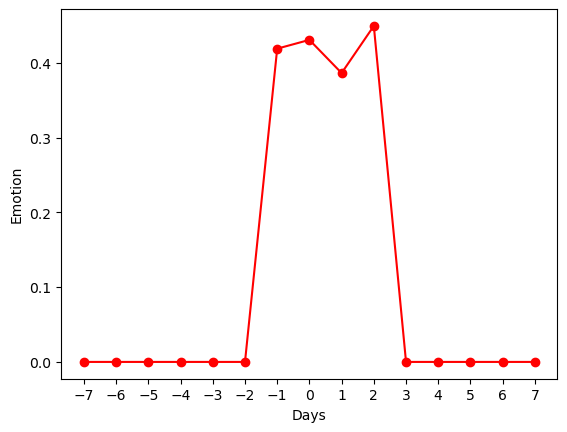

In [10]:
if(del_t==29):
    days_HI = [-14,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
    emotion_HI = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    
    plt.xlabel("Days")
    plt.ylabel("Emotion - joy")
    plt.plot(days_HI, emotion_HI)

else:
    days_LI = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7]
    emotion_LI = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    start = 0
    end = len(emotion_LI)-1
    mid = int((start+end)/2)
    year = int(input("Year: "))
    month = int(input("Month: "))
    day = int(input("Day: "))
    emotion = input("Emotion: ")
    
    emotion_LI[mid] = calculate_emotion_for_date("2020-04-05", emotion, year,month,day)
    emotion_LI[mid-1] = calculate_emotion_for_date("2020-04-04",emotion,year,month,4)
    emotion_LI[mid-2] = calculate_emotion_for_date("2020-04-03",emotion,year,month,3)
    emotion_LI[mid-3] = calculate_emotion_for_date("2020-04-02",emotion,year,month,2)
    emotion_LI[mid-4] = calculate_emotion_for_date("2020-04-01",emotion,year,month,1)
    month = 3
    emotion_LI[mid-5] = calculate_emotion_for_date("2020-03-31",emotion,year,month,31)
    emotion_LI[mid-6] = calculate_emotion_for_date("2020-03-30",emotion,year,month,30)
    emotion_LI[mid-7] = calculate_emotion_for_date("2020-03-29",emotion,year,month,29)
    month = 4
    emotion_LI[mid+1] = calculate_emotion_for_date("2020-04-06",emotion,year,month,6)
    emotion_LI[mid+2] = calculate_emotion_for_date("2020-04-07",emotion,year,month,7)
    emotion_LI[mid+3] = calculate_emotion_for_date("2020-04-08",emotion,year,month,8)
    emotion_LI[mid+4] = calculate_emotion_for_date("2020-04-09",emotion,year,month,9)
    emotion_LI[mid+5] = calculate_emotion_for_date("2020-04-10",emotion,year,month,10)
    emotion_LI[mid+6] = calculate_emotion_for_date("2020-04-11",emotion,year,month,11)
    emotion_LI[mid+7] = calculate_emotion_for_date("2020-04-12",emotion,year,month,12)
#     print(emotion_LI)
    
    plt.xlabel("Days")
    plt.ylabel("Emotion")
    plt.plot(days_LI, emotion_LI, 'ro-')
    plt.xticks(range(-7, 8))
    plt.show()